# Some Initial Setup

In [43]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(style="white", context="talk")

#Table of Content

1. [Loading Data](#read_data)
2. [Data Munging](#munging)
3. [Visualizing](#visualization)
4. [Selecting](#selecting)
5. [Group By and Aggregate Function](#group_by_agg)

## <a id='read_data'></a>1. Loading Data
"pandas" provides a data structure called "DataFrame" which is similar to excel spreadsheet. You can think of it as a table with column names and, optionally, row names. In this section, we will be loading all our data into DataFrame objects.

###a. Reading from csv file

In [49]:
bigBellyDf = pd.read_csv("/Users/vmandal/PersonalProjects/data-analysis/BigBellyBoston/data/Big_Belly_Alerts_2014.csv")

In [52]:
bigBellyDf.tail(10)

,description,timestamp,fullness,collection,Latitude,Longitude
51430,Marginal St and Tremont St,12/31/14 20:32,YELLOW,False,42.348114,-71.068025
51431,261 Hanover Street,12/31/14 20:34,RED,False,42.363600,-71.054870
51432,396 Hanover Street (Contrada coffee shop),12/31/14 20:50,YELLOW,False,42.365965,-71.052994
51433,563 Columbus Avenue,12/31/14 21:05,YELLOW,False,42.340870,-71.081430
51434,129 Tremont St (burger king),12/31/14 21:07,GREEN,True,42.356344,-71.062032
51435,Cambridge and Blosom St (Au Bon Pain),12/31/14 21:38,YELLOW,False,42.361276,-71.066578
51436,1309 Boylston Street,12/31/14 22:57,YELLOW,False,42.344205,-71.099219
51437,74 Berklee,12/31/14 23:32,RED,False,42.344300,-71.067000
51438,Commons: East of Frog Pond,12/31/14 23:50,YELLOW,False,42.356053,-71.064870
51439,Tremont 30th and Avery St (Loews Theatre),12/31/14 23:55,RED,False,42.353287,-71.064182


### b. Reading from an url

In [53]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

df = pd.read_csv(url, sep=';')

In [55]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [56]:
#Get the dimensions of the data frame
df.shape

(1599, 12)

### c. Read from database

In [57]:
import psycopg2
import pandas.io.sql as psql
conn = psycopg2.connect("host='localhost' port='5432' dbname='soccer' user='vmandal'")

In [58]:
sql = 'select * from english_soccer_result'
soccerDf = psql.read_sql_query(sql, conn, parse_dates=['match_date'])

In [59]:
soccerDf.head()

,match_date,season,home,visitor,fulltime,home_goal,away_goal,division,tier,total_goal,goal_diff,result,dt
0,1889-11-23,1889,Aston Villa,Everton,1-2,1,2,1,1,3,-1,A,1889-11-23
1,1894-09-08,1894,Stoke City,Everton,1-3,1,3,1,1,4,-2,A,1894-09-08
2,1888-12-15,1888,Accrington F.C.,Aston Villa,1-1,1,1,1,1,2,0,D,1888-12-15
3,1889-01-19,1888,Accrington F.C.,Blackburn Rovers,0-2,0,2,1,1,2,-2,A,1889-01-19
4,1889-03-23,1888,Accrington F.C.,Bolton Wanderers,2-3,2,3,1,1,5,-1,A,1889-03-23


### d. Read from clipboard

We will be copying some baseball data to clipboard and reading that data into a pandas data frame. Lets use this url: http://www.baseball-reference.com/players/j/jeterde01.shtml

In [60]:
baseballDf = pd.read_clipboard()

In [61]:
baseballDf.head()

,Year,Age,Tm,Lg,G,PA,AB,R,H,2B,...,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,Pos,Awards
0,1995,21,NYY,AL,15,51,48,5,12,4,...,0.669,74,18,0,0,0,0,0,6,NaN
1,1996,22,NYY,AL,157,654,582,104,183,25,...,0.800,101,250,13,9,6,9,1,*6,RoY-1
2,1997,23,NYY,AL,159,748,654,116,190,31,...,0.775,103,265,14,10,8,2,0,*6,MVP-24
3,1998 ★,24,NYY,AL,149,694,626,127,203,25,...,0.864,127,301,13,5,3,3,1,*6,"AS,MVP-3"
4,1999 ★,25,NYY,AL,158,739,627,134,219,37,...,0.989,153,346,12,12,3,6,5,*6,"AS,MVP-6"


##<a id='munging'/>2. Data Munging

In [62]:
bikeDf = pd.read_csv("../data/hour.csv", parse_dates=['dteday'])
bikeDf.head()

,dteday,hr,holiday,weathersit,temp,hum,windspeed,cnt
0,2011-01-01,0,0,1,0.24,0.81,0,16
1,2011-01-01,1,0,1,0.22,0.80,0,40
2,2011-01-01,2,0,1,0.22,0.80,0,32
3,2011-01-01,3,0,1,0.24,0.75,0,13
4,2011-01-01,4,0,1,0.24,0.75,0,1


In [63]:
bikeDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 8 columns):
dteday        17379 non-null datetime64[ns]
hr            17379 non-null int64
holiday       17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
cnt           17379 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 1.2 MB


###Adding new columns
pandas makes it very easy to add new columns to a data frame. Lets say we want to add a month column. This is all we have to do:

In [64]:
bikeDf['month'] = bikeDf.dteday.map(lambda x: x.month)

In [65]:
print bikeDf.head()

      dteday  hr  holiday  weathersit  temp   hum  windspeed  cnt  month
0 2011-01-01   0        0           1  0.24  0.81          0   16      1
1 2011-01-01   1        0           1  0.22  0.80          0   40      1
2 2011-01-01   2        0           1  0.22  0.80          0   32      1
3 2011-01-01   3        0           1  0.24  0.75          0   13      1
4 2011-01-01   4        0           1  0.24  0.75          0    1      1


In [66]:
bikeDf[['dteday', 'month']].tail()

,dteday,month
17374,2012-12-31,12
17375,2012-12-31,12
17376,2012-12-31,12
17377,2012-12-31,12
17378,2012-12-31,12


In [67]:
bikeDf['weekday'] = bikeDf.dteday.map(lambda x: x.weekday())
bikeDf.head()

,dteday,hr,holiday,weathersit,temp,hum,windspeed,cnt,month,weekday
0,2011-01-01,0,0,1,0.24,0.81,0,16,1,5
1,2011-01-01,1,0,1,0.22,0.80,0,40,1,5
2,2011-01-01,2,0,1,0.22,0.80,0,32,1,5
3,2011-01-01,3,0,1,0.24,0.75,0,13,1,5
4,2011-01-01,4,0,1,0.24,0.75,0,1,1,5


In [68]:
from datetime import datetime

def getSeason(dt):
    Y = dt.year
    seasons = [(1, (datetime(Y,  1,  1),  datetime(Y,  3, 20))),
           (2, (datetime(Y,  3, 21),  datetime(Y,  6, 20))),
           (3, (datetime(Y,  6, 21),  datetime(Y,  9, 22))),
           (4, (datetime(Y,  9, 23),  datetime(Y, 12, 20))),
           (1, (datetime(Y, 12, 21),  datetime(Y, 12, 31)))]

    return next(season for season, (start, end) in seasons
                if start <= dt <= end)

In [69]:
bikeDf['season'] = bikeDf.dteday.map(lambda x: getSeason(x))

In [70]:
#Renaming column
bikeDf.rename(columns={'season' : 'seas'}).head()

,dteday,hr,holiday,weathersit,temp,hum,windspeed,cnt,month,weekday,seas
0,2011-01-01,0,0,1,0.24,0.81,0,16,1,5,1
1,2011-01-01,1,0,1,0.22,0.80,0,40,1,5,1
2,2011-01-01,2,0,1,0.22,0.80,0,32,1,5,1
3,2011-01-01,3,0,1,0.24,0.75,0,13,1,5,1
4,2011-01-01,4,0,1,0.24,0.75,0,1,1,5,1


In [71]:
bikeDf.tail()

,dteday,hr,holiday,weathersit,temp,hum,windspeed,cnt,month,weekday,season
17374,2012-12-31,19,0,2,0.26,0.60,0.1642,119,12,0,1
17375,2012-12-31,20,0,2,0.26,0.60,0.1642,89,12,0,1
17376,2012-12-31,21,0,1,0.26,0.60,0.1642,90,12,0,1
17377,2012-12-31,22,0,1,0.26,0.56,0.1343,61,12,0,1
17378,2012-12-31,23,0,1,0.26,0.65,0.1343,49,12,0,1


In [72]:
#Assigning column names

cols = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
        'marital_status', 'occupation', 'relationship', 'ethnicity',
        'gender', 'capital_gain', 'capital_loss', 'hours_per_week',
        'country_of_origin', 'income']

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', names = cols)

In [73]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_loss,hours_per_week,country_of_origin,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [74]:
# Some descriptive stats
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,189778.366512,10.080679,1077.648844,87.303830,40.437456
std,13.640433,105549.977697,2.572720,7385.292085,402.960219,12.347429
min,17.000000,12285.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,117827.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,178356.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,237051.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,1484705.000000,16.000000,99999.000000,4356.000000,99.000000


### Find Missing Values

In [75]:
# Creating a data frame with missing values

nullDf = pd.DataFrame([1,2,4,np.nan], columns = ['column1'])
print nullDf

   column1
0        1
1        2
2        4
3      NaN


In [76]:
#Find rows with missing values
nullDf[nullDf.column1.isnull()]

,column1
3,NaN


### Fill Missing Values

In [77]:
#Replace missing with specific number
nullDf.column1.fillna(1000)

0       1
1       2
2       4
3    1000
Name: column1, dtype: float64

In [78]:
#Fill missing data with median
nullDf.column1.fillna(nullDf.column1.median())

0    1
1    2
2    4
3    2
Name: column1, dtype: float64

##<a id='visualization'></a>3. Visualization

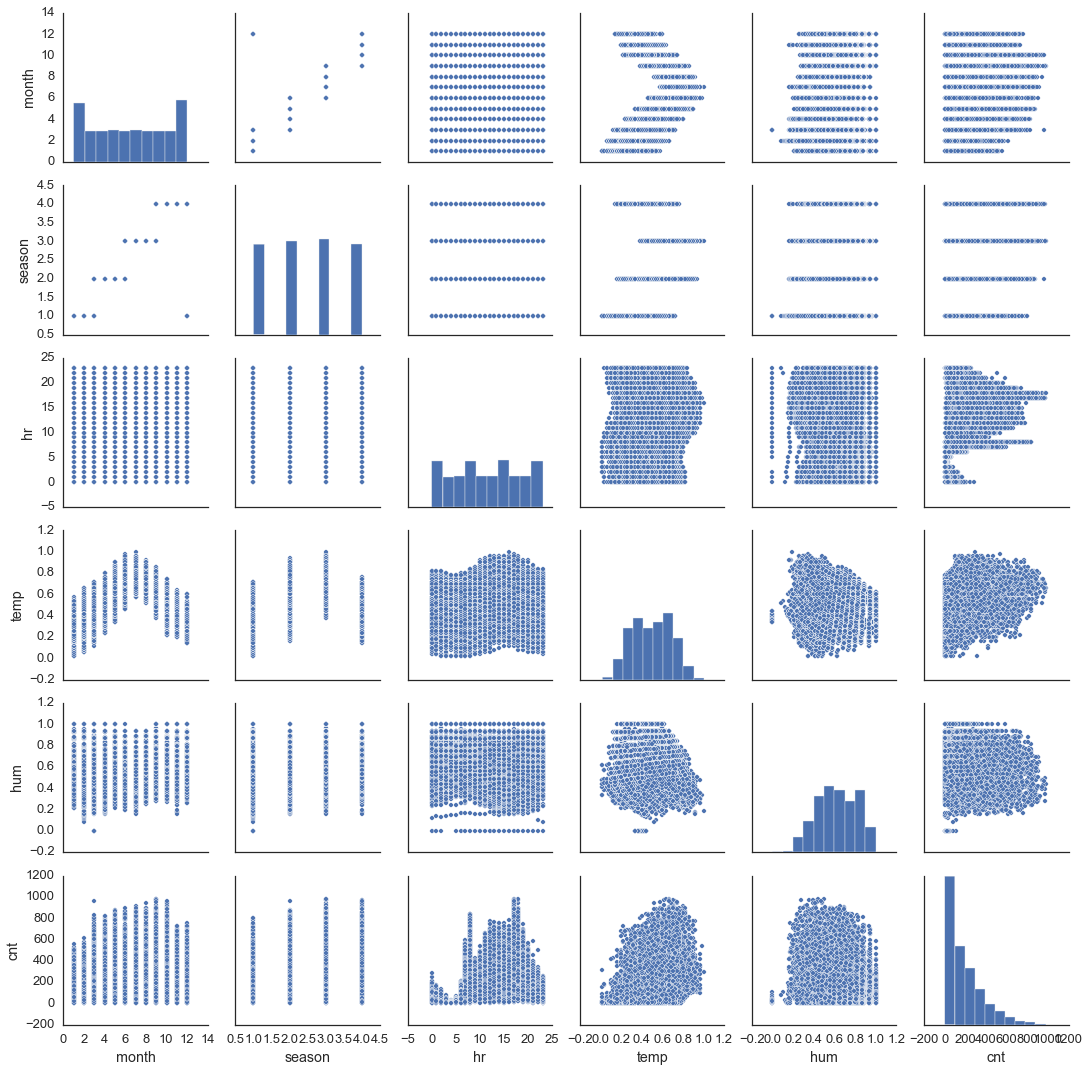

In [79]:
# Plot pairwise relationship
sns.pairplot(bikeDf[['month', 'season', 'hr', 'temp', 'hum', 'cnt']])

### Plot Counts by temperature

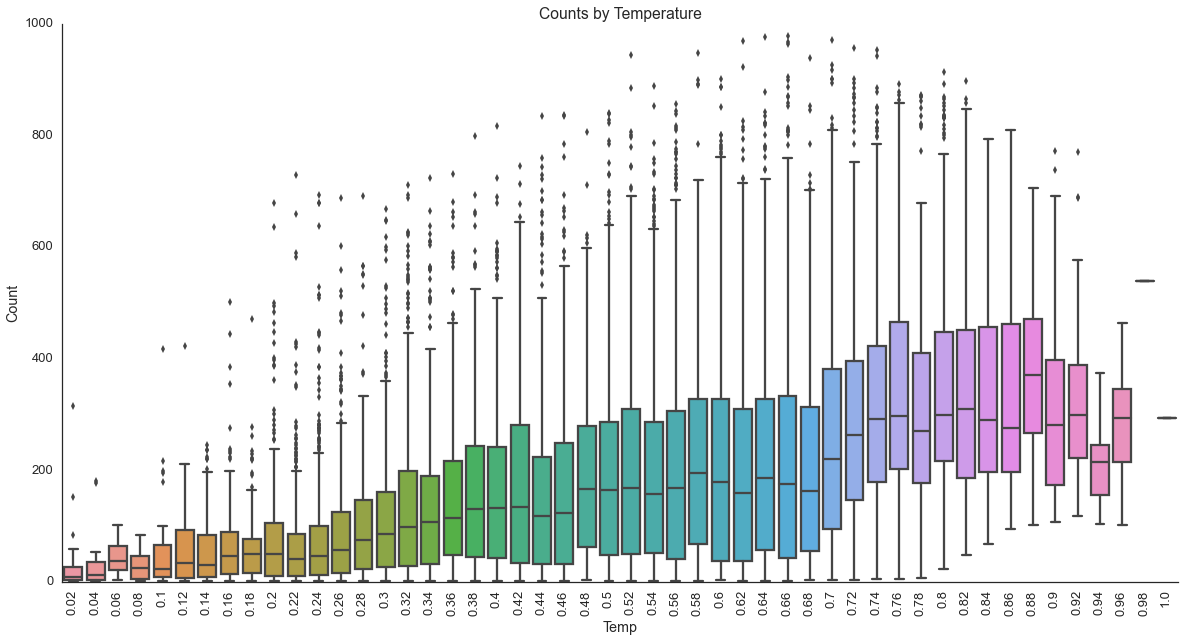

In [80]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.set_title('Counts by Temperature')
# Create a seaborn boxplot of count by temperature ordered by temperature
sns.boxplot(x=bikeDf['temp'].order(), y=bikeDf['cnt'])
ax.set_xlabel('Temp')
ax.set_ylabel('Count')
plt.xticks(rotation=90)
sns.despine()

### Plot Counts by Hour of Day

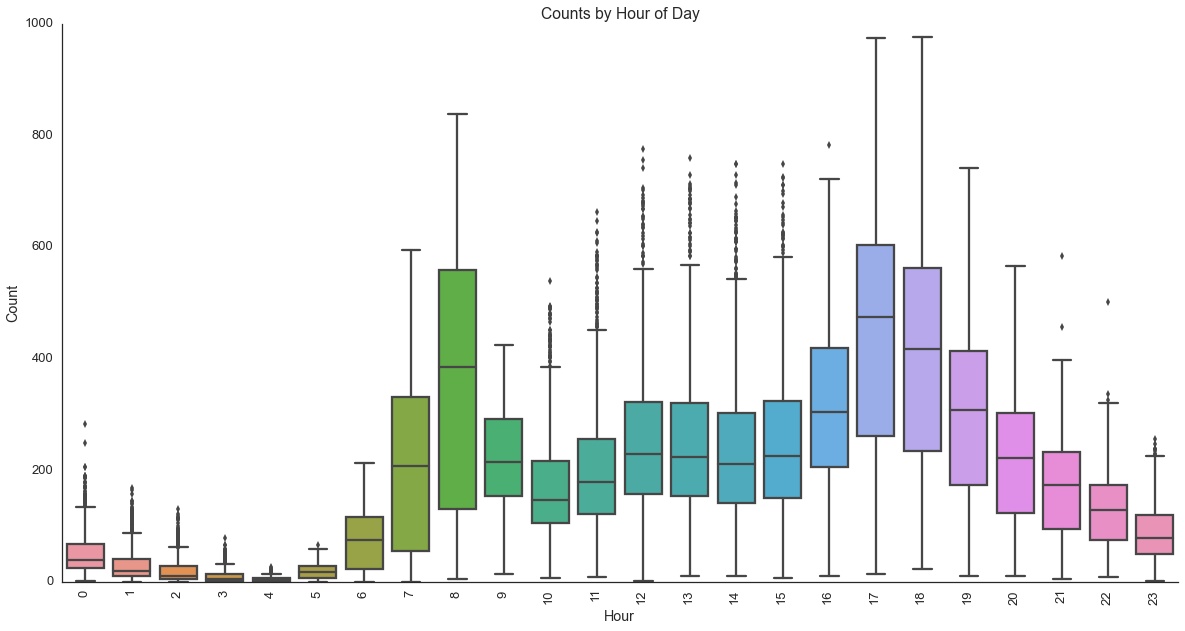

In [81]:
fig, ax = plt.subplots(1,1, figsize=(20,10))
ax.set_title('Counts by Hour of Day')
# Create a seaborn boxplot of count by temperature ordered by temperature
sns.boxplot(x=bikeDf['hr'].order(), y=bikeDf['cnt'])
ax.set_xlabel('Hour')
ax.set_ylabel('Count')
plt.xticks(rotation=90)
sns.despine()

##<a id='selecting'/>4. Selecting

In [82]:
# Select all the rows with weekday 0 (Monday)
bikeDf[bikeDf.weekday == 0].tail()

,dteday,hr,holiday,weathersit,temp,hum,windspeed,cnt,month,weekday,season
17374,2012-12-31,19,0,2,0.26,0.60,0.1642,119,12,0,1
17375,2012-12-31,20,0,2,0.26,0.60,0.1642,89,12,0,1
17376,2012-12-31,21,0,1,0.26,0.60,0.1642,90,12,0,1
17377,2012-12-31,22,0,1,0.26,0.56,0.1343,61,12,0,1
17378,2012-12-31,23,0,1,0.26,0.65,0.1343,49,12,0,1


In [83]:
print 'Before:'
print bikeDf.shape
print 'After:'
print bikeDf[bikeDf.weekday == 1].shape

Before:
(17379, 11)
After:
(2453, 11)


In [209]:
#Selecting subset of columns
print bikeDf[['dteday', 'hr']].head()

      dteday  hr
0 2011-01-01   0
1 2011-01-01   1
2 2011-01-01   2
3 2011-01-01   3
4 2011-01-01   4


In [84]:
#Selecting subset by row numbers
bikeDf.iloc[2421:2429]

,dteday,hr,holiday,weathersit,temp,hum,windspeed,cnt,month,weekday,season
2421,2011-04-15,19,1,1,0.42,0.77,0.3881,209,4,4,2
2422,2011-04-15,20,1,2,0.40,0.76,0.3284,118,4,4,2
2423,2011-04-15,21,1,2,0.40,0.76,0.2985,102,4,4,2
2424,2011-04-15,22,1,2,0.38,0.82,0.3881,80,4,4,2
2425,2011-04-15,23,1,2,0.36,0.81,0.1940,64,4,4,2
2426,2011-04-16,0,0,2,0.36,0.81,0.2239,43,4,5,2
2427,2011-04-16,1,0,2,0.36,0.87,0.2836,33,4,5,2
2428,2011-04-16,2,0,2,0.36,0.87,0.1343,24,4,5,2


##<a id='group_by_agg'/>5. Group By and Aggregate Function

"groupby" in pandas refers to a process involving one or more of the the followings:
* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure

In [85]:
groupedByWDay = bikeDf.groupby('weekday')

In [86]:
groupedByWDay['cnt'].describe()

weekday       
0        count    2479.000000
         mean      183.744655
         std       179.514167
         min         1.000000
         25%        37.000000
         50%       139.000000
         75%       268.000000
         max       968.000000
1        count    2453.000000
         mean      191.238891
         std       187.820480
         min         1.000000
         25%        36.000000
         50%       147.000000
         75%       276.000000
         max       970.000000
2        count    2475.000000
         mean      191.130505
         std       190.894464
         min         1.000000
         25%        36.000000
         50%       143.000000
         75%       274.500000
         max       977.000000
3        count    2471.000000
         mean      196.436665
         std       188.011923
         min         1.000000
         25%        42.000000
         50%       154.000000
         75%       280.000000
         max       976.000000
4        count    2487.00

In [87]:
groupedByWDayMean = groupedByWDay.mean()
groupedByWDayMean

,hr,holiday,weathersit,temp,hum,windspeed,cnt,month,season
weekday,,,,,,,,,
0,11.556676,0.144010,1.431222,0.495046,0.635651,0.188863,183.744655,6.479225,2.488503
1,11.622095,0.009376,1.476152,0.508569,0.639833,0.191917,191.238891,6.516918,2.529148
2,11.527273,0.009697,1.485657,0.506675,0.644820,0.187172,191.130505,6.543838,2.510707
3,11.556050,0.019425,1.402266,0.507017,0.609628,0.191987,196.436665,6.590045,2.521651
4,11.527945,0.019300,1.412143,0.496429,0.613840,0.186430,196.135907,6.593888,2.495778
5,11.483678,0.000000,1.408838,0.481847,0.619084,0.196190,190.209793,6.553344,2.476115
6,11.555156,0.000000,1.362110,0.483821,0.627994,0.188093,177.468825,6.487210,2.490408


##Bonus Material - Feature Engineering

###Does the count variable depend on work day?

In [88]:
#Lets create a workday column to indicate if it is workday or not
def isWorkDay(row):
    if row['weekday'] >= 0 and row['weekday'] <= 4 and row['holiday'] == 0:
        return 1
    return 0
    
bikeDf['workday'] = bikeDf.apply(lambda row: isWorkDay(row), axis=1)

In [89]:
bikeDf.head()

,dteday,hr,holiday,weathersit,temp,hum,windspeed,cnt,month,weekday,season,workday
0,2011-01-01,0,0,1,0.24,0.81,0,16,1,5,1,0
1,2011-01-01,1,0,1,0.22,0.80,0,40,1,5,1,0
2,2011-01-01,2,0,1,0.22,0.80,0,32,1,5,1,0
3,2011-01-01,3,0,1,0.24,0.75,0,13,1,5,1,0
4,2011-01-01,4,0,1,0.24,0.75,0,1,1,5,1,0


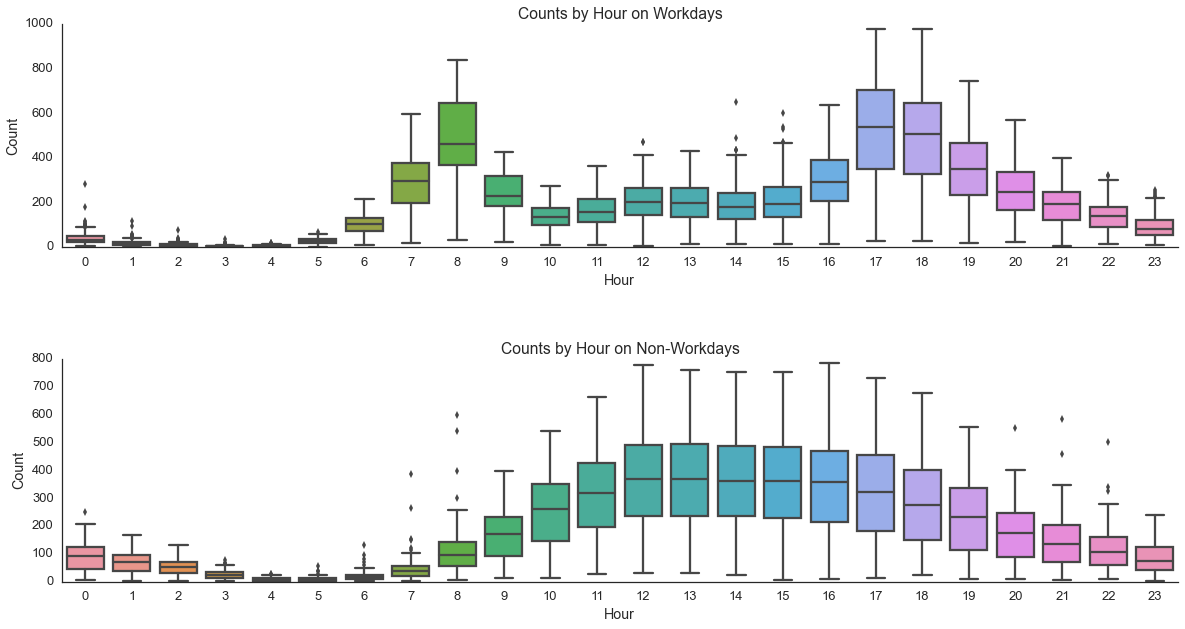

In [90]:
fig, axes = plt.subplots(2,1, figsize=(20,10))
ax = axes[0]
ax.set_title('Counts by Hour on Workdays')

sns.boxplot(x=bikeDf[bikeDf['workday']==1]['hr'].order(), y=bikeDf['cnt'], ax=ax)
ax.set_xlabel('Hour')
ax.set_ylabel('Count')
ax = axes[1]
ax.set_title('Counts by Hour on Non-Workdays')

sns.boxplot(x=bikeDf[bikeDf['workday']==0]['hr'].order(), y=bikeDf['cnt'], ax=ax)
ax.set_xlabel('Hour')
ax.set_ylabel('Count')

sns.despine()

## Another Bonus Material - Plotting on map
We will use the Boston Big Belly data we read at the very beginning to plot the location of Big Belly trash receptacles with their fullness status.

In [91]:
from IPython.display import HTML

def display(m, height=500):
    """Takes a folium instance and embed HTML."""
    m._build_map()
    srcdoc = m.HTML.replace('"', '&quot;')
    embed = HTML('<iframe srcdoc="{0}" '
                 'style="width: 100%; height: {1}px; '
                 'border: none"></iframe>'.format(srcdoc, height))
    return embed

In [92]:
import folium

BOSTON_COORDINATES = (42.3499, -71.0763)

tileset = 'https://stamen-tiles-{s}.a.ssl.fastly.net/toner/{z}/{x}/{y}.png'
bBellyMap = folium.Map(location=BOSTON_COORDINATES, tiles=tileset, 
                       zoom_start=14, attr='Stamen')

latitudes = bigBellyDf.Latitude.tolist()
longitudes = bigBellyDf.Longitude.tolist()

def getFullnessNumber(fullness):
    fulnessDict = {'GREEN': '#668014', 'YELLOW': '#FFE303', 'RED': '#FF0000'}
    return fulnessDict[fullness]

fullness = bigBellyDf.fullness.map(lambda x: getFullnessNumber(x)).tolist()

latLons = zip(latitudes, longitudes, fullness)

for (lat, lon, fullnessColor) in latLons[:20]:
    bBellyMap.circle_marker(location=[lat, lon], fill_color=fullnessColor, radius=90)

In [93]:
display(bBellyMap)